In [1]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
matplotlib.use("TkAgg")

LARGE_FONT = ("Verdana", 12)

c:\users\jakub\appdata\local\programs\python\python35\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [28]:
class LabelApp(tk.Tk):
    
    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)
        
        #tk.Tk.iconbitmap(self, default="clienticon.ico")
        tk.Tk.wm_title(self,  "Sea of BTC Client")

        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (Config, Graph,):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(Graph)

    def show_frame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()


class Config(tk.Frame):
    
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = ttk.Label(self, text="Config", font=LARGE_FONT)
        label.pack(padx=50, pady=50)

        button = ttk.Button(self, text="Graph", 
                            command=lambda: controller.show_frame(Graph))
        button.pack()

        
class Graph(tk.Frame):
    
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Up arrow for 0 (good), down arrow for 1 (bad)", font=LARGE_FONT)
        label.pack(padx=10, pady=10)
        
        fig = Figure(figsize=(10,3), dpi=100)
        a = fig.add_subplot(111)
        
        self.X = np.linspace(-np.pi, np.pi, 1000)
        self.Y = 2 + np.sin(self.X) + np.hstack((0.1*np.random.randn(333), 0.2*np.random.randn(334), 0.1*np.random.randn(333)))
        a.scatter(self.X, self.Y, s=1)
        
        canvas = FigureCanvasTkAgg(fig, self)
        canvas.show()
        canvas.get_tk_widget().pack(side="bottom", fill="both", expand=True)
        
        toolbar = NavigationToolbar2TkAgg(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        def up(event=None):
            print("lol")
            a.clear()
            self.Y = self.Y**2
            a.scatter(self.X, self.Y, s=1)
            canvas.show()
            
        def down(event=None):
            print("lul")
            a.clear()
            self.Y = self.Y**(1/2)
            a.scatter(self.X, self.Y, s=1)
            canvas.show()
        
        controller.bind("<Up>", up)
        controller.bind("<Down>", down)

In [21]:
class Dataset:
    def __init__(self, path, chunk_size=1000, step=0):
        self.path = path
        self.chunk_size = chunk_size
        self.step = step
        
        self._read_data()
        
    def _read_data(self):
        data = np.fromfile(self.path)
        
    def show(self):
        print(self.data)
        
    def next_chunk(self):
        raise NotImplementedError()

In [70]:
X = np.linspace(-np.pi, np.pi, 10000)
Y = np.sin(X) + np.hstack((0.1*np.random.randn(3333), 0.2*np.random.randn(3334), 0.1*np.random.randn(3333)))
np.savetxt('testfile.txt', np.vstack([X, Y]))

In [74]:
test = np.fromfile('testfile.txt', sep=' ')

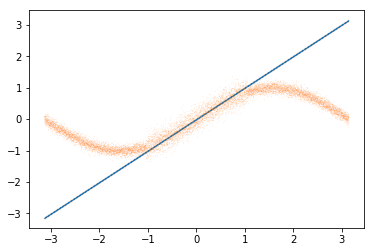

In [87]:
temp = test.reshape((10000, 2), order='F')
plt.scatter(temp[:,0], temp[:,0], s=.001)
plt.scatter(temp[:,0], temp[:,1], s=.001)
plt.show()

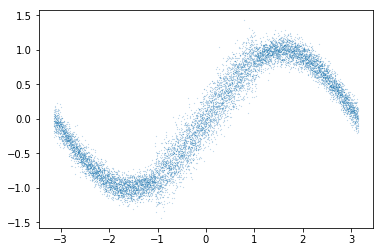

In [39]:
plt.scatter(X,Y, s=.01);plt.show()

In [17]:
def write(path, content):
    with open(path, "a") as f:
        f.write(content)

In [20]:
for i in range(10):
    write('testfile.txt', str(i**2) + '\n')

In [30]:
app = LabelApp()
app.mainloop()

lol
lul
lol
lol
lol
lul
lul
lul
lul
lul
lul
lul
lul
lol
lol
lol
lol
lol
